In [4]:
import re
import pandas as pd
from datetime import datetime
from clickhouse_driver import Client

In [100]:
database = 'inst'
client = Client('wsmsk1ld001.west.msk', database=database)

query = """
select shortcode, comments_count, liked_by, media_preview_like, ig_user_id, username
from ig_users_posts
any inner join
(select blogger_id as ig_user_id, ig_username as username
from inst.bloggers
where username in 
    ('gusein.gasanov',
    'mikhail_litvin',
    'yan_gordienko',
    'tatarkafm',
    'marina_phedunkiv',
    'rahimabramov',
    'lubyatinka',
    'anella_miller',
    'dava_m',
    'krasnovanatasha',
    'helen_yes1',
    'senoritasaeva',
    'sofiyabroyan',
    'ritadakota',
    'sobolevv',
    'love_is_top',
    'danvirlan',
    'subo_m',
    'madam_kaka',
    '_ellidi',
    'shteps_s',
    'klavacoca',
    'gasanov.live',
    'kagramana',
    'vovagauti',
    'alknv',
    '_wengallbi_',
    'dimagordey',
    'karinakross',
    'arnisaveolla',
    'anokhina_elizabeth_2007',
    'anokhina_elizabeth',
    's_romanovich',
    'lusia_chebotina',
    'igor_humor',
    'polyaizderevki',
    'vasilina_kat',
    'airrisha',
    'jon_yusupov',
    'vberberyy',
    'houusse',
    'dima_maslen',
    'nikita_zlatoust',
    'nastiagoncul',
    'arinadanilova_official',
    's_ship',
    '_poposha_',
    'aida.offi',
    'svetlusya',
    'elenaraytman',
    'xeniagara',
    'elmofeo',
    'nastyahertz',
    'leomalikov',
    'sychevskaya',
    'daysofbers',
    'ignattagiev',
    'said_xxl',
    'tillnyaschka',
    'kachenok',
    'viktoriyabliss',
    'alexandrovannya',
    'kostya_zzz',
    'iskrenochka_jizn',
    'chiblls',
    'maevamasha',
    'nelly_aydartsyan',
    'aishavyskubova',
    'arrakelyaan',
    'bittuevv',
    'anny_magik',
    'mahavsekruto',
    'sobolev_tut',
    'allazemaalla',
    'masterildar',
    'boy_kov',
    'lubyatinka_free',
    'stoliarovaleksey',
    'kozheed',
    'bers_review',
    'mfpets',
    'slimzmusic',
    'helen_yes1_twins',
    'redtonie',
    'aveme_lissa',
    'milanka_ts',
    'edidkovskaya',
    'el_man_official',
    'hi_jey',
    'madam_papaya',
    'sidelnikov120',
    'rina.make.up',
    'exile_music',
    'katyushka_tyan',
    'alenarapay',
    'momocka',
    'staisy_johnson',
    'dontworry198',
    '13kaii',
    'olya_chick',
    'shtepslife',
    'maxalro',
    'manukian_twins',
    'ira_blanc',
    'igavrilenko',
    'mochkaaai',
    'raminalalala',
    'daniro23',
    '5etazzh',
    'starosvitskiy1',
    'murataev',
    'nila_mania',
    'yulian_tv',
    'denisflin',
    'ohtioma',
    'steveprinceofficial',
    'shevchuk_misha',
    'starikova.tv',
    'lazarev94',
    'dreamofphil',
    'jane_kravitz',
    'zhanna.radova',
    'babeshking',
    'banana_kris',
    'vdavankova',
    'niknayse',
    'istiglitz',
    'svetasollar'))
using ig_user_id
"""
query_res = client.execute(query)

In [101]:
len(query_res)

28648

In [89]:
query_bl = """
select blogger_id, ig_username as username, followers, follows, posts_count, is_verified, business_category_name
from inst.bloggers
any left join
    (select username, business_category_name
    from ig_users_v2)
using username
where username in 
    ('gusein.gasanov',
    'mikhail_litvin',
    'yan_gordienko',
    'tatarkafm',
    'marina_phedunkiv',
    'rahimabramov',
    'lubyatinka',
    'anella_miller',
    'dava_m',
    'krasnovanatasha',
    'helen_yes1',
    'senoritasaeva',
    'sofiyabroyan',
    'ritadakota',
    'sobolevv',
    'love_is_top',
    'danvirlan',
    'subo_m',
    'madam_kaka',
    '_ellidi',
    'shteps_s',
    'klavacoca',
    'gasanov.live',
    'kagramana',
    'vovagauti',
    'alknv',
    '_wengallbi_',
    'dimagordey',
    'karinakross',
    'arnisaveolla',
    'anokhina_elizabeth_2007',
    'anokhina_elizabeth',
    's_romanovich',
    'lusia_chebotina',
    'igor_humor',
    'polyaizderevki',
    'vasilina_kat',
    'airrisha',
    'jon_yusupov',
    'vberberyy',
    'houusse',
    'dima_maslen',
    'nikita_zlatoust',
    'nastiagoncul',
    'arinadanilova_official',
    's_ship',
    '_poposha_',
    'aida.offi',
    'svetlusya',
    'elenaraytman',
    'xeniagara',
    'elmofeo',
    'nastyahertz',
    'leomalikov',
    'sychevskaya',
    'daysofbers',
    'ignattagiev',
    'said_xxl',
    'tillnyaschka',
    'kachenok',
    'viktoriyabliss',
    'alexandrovannya',
    'kostya_zzz',
    'iskrenochka_jizn',
    'chiblls',
    'maevamasha',
    'nelly_aydartsyan',
    'aishavyskubova',
    'arrakelyaan',
    'bittuevv',
    'anny_magik',
    'mahavsekruto',
    'sobolev_tut',
    'allazemaalla',
    'masterildar',
    'boy_kov',
    'lubyatinka_free',
    'stoliarovaleksey',
    'kozheed',
    'bers_review',
    'mfpets',
    'slimzmusic',
    'helen_yes1_twins',
    'redtonie',
    'aveme_lissa',
    'milanka_ts',
    'edidkovskaya',
    'el_man_official',
    'hi_jey',
    'madam_papaya',
    'sidelnikov120',
    'rina.make.up',
    'exile_music',
    'katyushka_tyan',
    'alenarapay',
    'momocka',
    'staisy_johnson',
    'dontworry198',
    '13kaii',
    'olya_chick',
    'shtepslife',
    'maxalro',
    'manukian_twins',
    'ira_blanc',
    'igavrilenko',
    'mochkaaai',
    'raminalalala',
    'daniro23',
    '5etazzh',
    'starosvitskiy1',
    'murataev',
    'nila_mania',
    'yulian_tv',
    'denisflin',
    'ohtioma',
    'steveprinceofficial',
    'shevchuk_misha',
    'starikova.tv',
    'lazarev94',
    'dreamofphil',
    'jane_kravitz',
    'zhanna.radova',
    'babeshking',
    'banana_kris',
    'vdavankova',
    'niknayse',
    'istiglitz',
    'svetasollar')
order by date_added desc
limit 1 by username
"""
query_bl_res = client.execute(query_bl)

In [91]:
len(np.unique([i[1] for i in query_bl_res]))

128

In [90]:
len(query_bl_res)

128

In [96]:
blogers = pd.DataFrame(query_bl_res, columns = ['blogger_id', 'username', 'followers', 'follows',
                                                'posts_count', 'is_verified', 'business_category_name'])

In [98]:
blogers.head()

,blogger_id,username,followers,follows,posts_count,is_verified,business_category_name
0,3174785729,tatarkafm,3188967,167,427,False,General Interest
1,193442956,yan_gordienko,3178115,326,851,True,None
2,449490951,gusein.gasanov,7225852,89,272,False,Creators & Celebrities
3,1338246453,mikhail_litvin,4013580,268,451,False,Creators & Celebrities
4,1199309121,senoritasaeva,2020603,47,111,False,Creators & Celebrities


In [102]:
blogers_posts = pd.DataFrame(query_res, columns=['shortcode', 'comments_count', 'liked_by', 
                                                 'media_preview_like', 'ig_user_id', 'username'])

In [103]:
blogers_posts.head()

,shortcode,comments_count,liked_by,media_preview_like,ig_user_id,username
0,Bm3fMoOjSwT,31,13287,13287,2705287,staisy_johnson
1,Bm8d1LwjZv4,138,12079,12079,2705287,staisy_johnson
2,BnGQYP8jsVY,44,10697,10697,2705287,staisy_johnson
3,BnHSrvEDedn,60,10412,10412,2705287,staisy_johnson
4,BnJMy27Dwup,49,6982,6982,2705287,staisy_johnson


In [111]:
bloggers_posts_stats = blogers_posts[['comments_count','liked_by','media_preview_like','username']]\
    .groupby('username').median().reset_index()

In [114]:
blogers = blogers.merge(bloggers_posts_stats, on='username')

In [115]:
blogers.head()

,blogger_id,username,followers,follows,posts_count,is_verified,business_category_name,comments_count,liked_by,media_preview_like
0,3174785729,tatarkafm,3188967,167,427,False,General Interest,1514.0,254941.5,254941.5
1,193442956,yan_gordienko,3178115,326,851,True,None,550.5,83516.5,83516.5
2,449490951,gusein.gasanov,7225852,89,272,False,Creators & Celebrities,4362.0,296247.5,296247.5
3,1338246453,mikhail_litvin,4013580,268,451,False,Creators & Celebrities,3241.0,341905.0,341905.0
4,1199309121,senoritasaeva,2020603,47,111,False,Creators & Celebrities,2258.0,124482.0,124482.0


In [ ]:
blogers.to_csv('bloggers_info.csv', sep = ';', index = False)

## read files

In [23]:
blogers = pd.read_csv('bloggers_info.csv', sep = ';')

In [25]:
blogers.head()

,blogger_id,username,followers,follows,posts_count,is_verified,business_category_name,comments_count,liked_by,media_preview_like
0,5425932310,polyaizderevki,1753156,58,159,False,General Interest,87.5,11857.0,11857.0
1,208429586,sofiyabroyan,2172401,279,4056,False,Creators & Celebrities,2.0,91.0,91.0
2,4179324631,lazarev94,111195,109,472,False,None,32.0,4457.0,4457.0
3,436618920,houusse,865983,494,1059,False,Creators & Celebrities,242.0,44787.0,44787.0
4,301197247,kozheed,307296,57,1263,False,Creators & Celebrities,28.0,7077.0,7077.0


In [117]:
price = pd.read_csv('bloggers_price.csv', encoding='cp1251', sep = ';')

In [120]:
blogers = blogers.merge(price[['username','price']], on='username')

In [121]:
blogers.head()

,blogger_id,username,followers,follows,posts_count,is_verified,business_category_name,comments_count,liked_by,media_preview_like,price
0,3174785729,tatarkafm,3188967,167,427,False,General Interest,1514.0,254941.5,254941.5,330000
1,193442956,yan_gordienko,3178115,326,851,True,None,550.5,83516.5,83516.5,150000
2,449490951,gusein.gasanov,7225852,89,272,False,Creators & Celebrities,4362.0,296247.5,296247.5,715000
3,1338246453,mikhail_litvin,4013580,268,451,False,Creators & Celebrities,3241.0,341905.0,341905.0,300000
4,1199309121,senoritasaeva,2020603,47,111,False,Creators & Celebrities,2258.0,124482.0,124482.0,130000


## model

In [151]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [174]:
X = blogers[['followers','follows','posts_count','comments_count','liked_by']]
Y = blogers['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [175]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [176]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     121.8
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           4.33e-35
Time:                        14:40:07   Log-Likelihood:                -979.45
No. Observations:                  83   AIC:                             1971.
Df Residuals:                      77   BIC:                             1985.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2631.1257   7329.572      0.

In [177]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [178]:
r2_score(y_train,predictions_train)

0.8877221533462704

In [179]:
mean_absolute_error(y_train,predictions_train)/y_train.mean()

0.27834072576343716

In [180]:
r2_score(y_test,predictions_test)

0.7601297106115101

In [181]:
mean_absolute_error(y_test,predictions_test)/y_test.mean()

0.3014813149803377

## full model

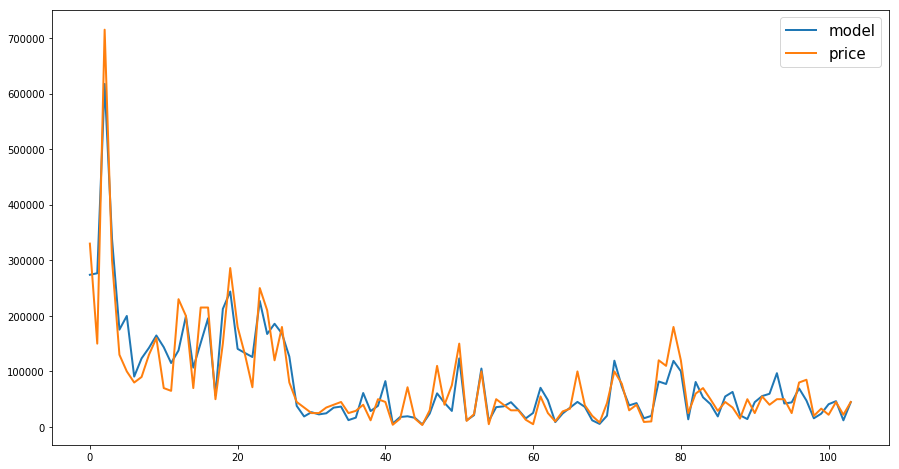

In [182]:
plt.figure(figsize=(15,8))
plt.plot(predictions,linewidth=2,label='model')
plt.plot(Y,linewidth=2,label='price')
plt.legend(loc='upper right',prop={'size': 15})

#### train

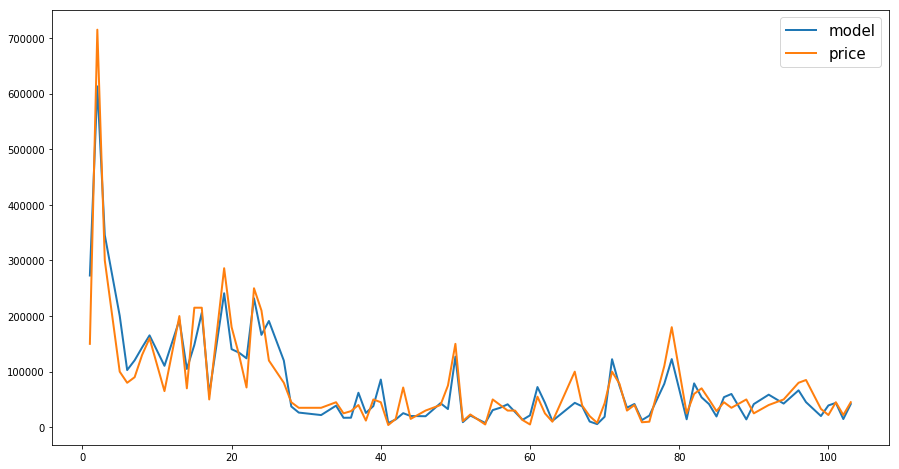

In [183]:
plt.figure(figsize=(15,8))
plt.plot(predictions_train.sort_index(),linewidth=2,label='model')
plt.plot(y_train.sort_index(),linewidth=2,label='price')
plt.legend(loc='upper right',prop={'size': 15})

#### test

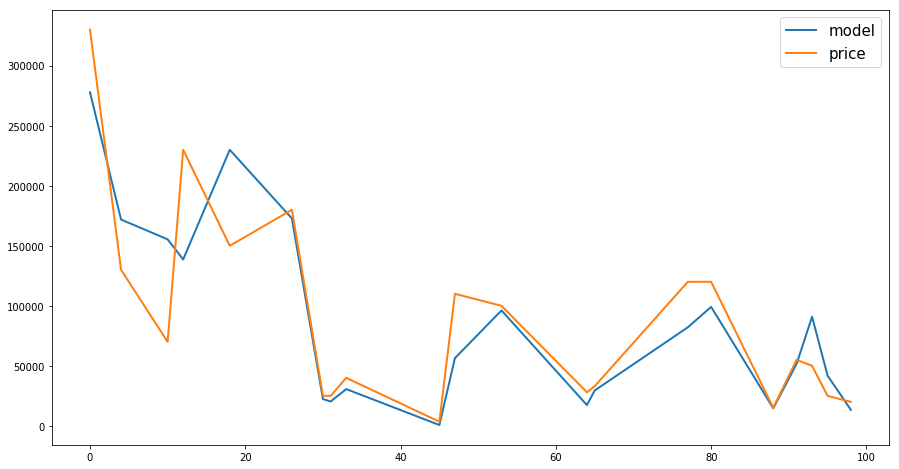

In [163]:
plt.figure(figsize=(15,8))
plt.plot(predictions_test.sort_index(),linewidth=2,label='model')
plt.plot(y_test.sort_index(),linewidth=2,label='price')
plt.legend(loc='upper right',prop={'size': 15})

## iter 2

In [170]:
blogers['like_perc'] = blogers.liked_by/blogers.followers

In [275]:
blogers.is_verified = blogers.is_verified.apply(lambda x: False if x == 'False' else True)

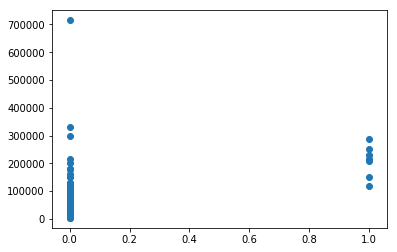

In [276]:
plt.scatter(blogers.is_verified,blogers.price)

In [314]:
#X = pd.concat([blogers[['followers','follows','posts_count','comments_count','like_perc']],pd.get_dummies(blogers.is_verified)],axis=1)
#X = pd.concat([blogers[['followers','follows','posts_count','comments_count','like_perc']],pd.get_dummies(blogers.business_category_name)],axis=1)
X = blogers[['followers','follows','posts_count','comments_count','like_perc']]
Y = blogers['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#X_train = sm.add_constant(X_train)
#X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           2.18e-44
Time:                        17:40:33   Log-Likelihood:                -978.83
No. Observations:                  83   AIC:                             1968.
Df Residuals:                      78   BIC:                             1980.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
followers          0.0853      0.003     25.

In [315]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [316]:
r2_score(y_train,predictions_train)

0.8893946984664897

In [317]:
mean_absolute_error(y_train,predictions_train)/y_train.mean()

0.2774795308523458

In [318]:
r2_score(y_test,predictions_test)

0.7681891042638253

In [319]:
mean_absolute_error(y_test,predictions_test)/y_test.mean()

0.29729984386149216

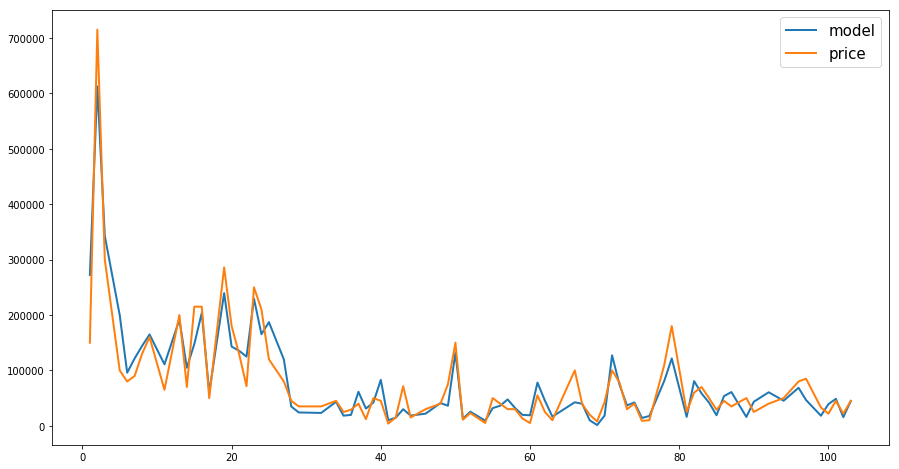

In [320]:
plt.figure(figsize=(15,8))
plt.plot(predictions_train.sort_index(),linewidth=2,label='model')
plt.plot(y_train.sort_index(),linewidth=2,label='price')
plt.legend(loc='upper right',prop={'size': 15})

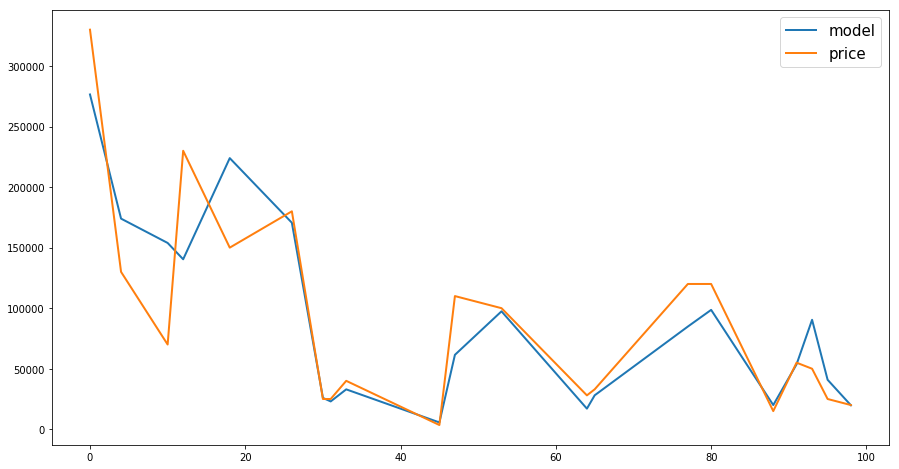

In [321]:
plt.figure(figsize=(15,8))
plt.plot(predictions_test.sort_index(),linewidth=2,label='model')
plt.plot(y_test.sort_index(),linewidth=2,label='price')
plt.legend(loc='upper right',prop={'size': 15})

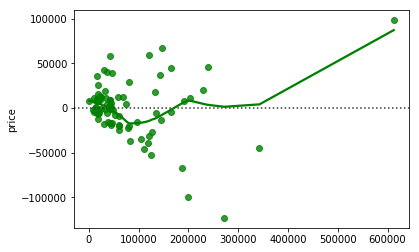

In [322]:
sns.residplot(predictions_train.sort_index(), y_train.sort_index(), lowess=True, color="g")

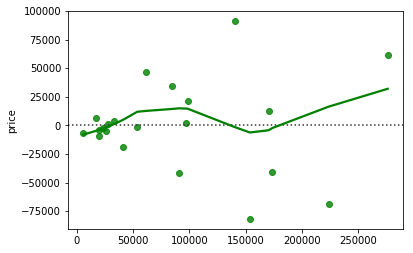

In [323]:
sns.residplot(predictions_test.sort_index(), y_test.sort_index(), lowess=True, color="g")

# PREDICT

In [324]:
database = 'inst'
client = Client('wsmsk1ld001.west.msk', database=database)

query_pred = """
select shortcode, comments_count, liked_by, media_preview_like, ig_user_id, username
from ig_users_posts
any inner join
(select blogger_id as ig_user_id, ig_username as username
from inst.bloggers
where ig_user_id in 
    (217234554,
    286790215,
    55328367,
    1986240228,
    1793232401,
    207191090,
    1111739332,
    4027942946,
    204838657,
    10554457,
    205819659,
    237010671,
    185732852,
    177931244,
    248535263,
    36959122,
    34684003,
    5346502,
    3373559,
    7745991147,
    46829718,
    7061024,
    9009373,
    267685466,
    449490951,
    271229086,
    2030072568,
    5697152,
    22288455,
    1352288822,
    333052291,
    237074561,
    336735088,
    251137241,
    189003872,
    194697262,
    1561649438,
    1516824713,
    363632546,
    19343908))
using ig_user_id
"""
query_pred_res = client.execute(query_pred)

In [327]:
query_pred_bl = """
select blogger_id, ig_username as username, followers, follows, posts_count, is_verified, business_category_name
from inst.bloggers
any left join
    (select username, business_category_name
    from ig_users_v2)
using username
where blogger_id in 
    (217234554,
    286790215,
    55328367,
    1986240228,
    1793232401,
    207191090,
    1111739332,
    4027942946,
    204838657,
    10554457,
    205819659,
    237010671,
    185732852,
    177931244,
    248535263,
    36959122,
    34684003,
    5346502,
    3373559,
    7745991147,
    46829718,
    7061024,
    9009373,
    267685466,
    449490951,
    271229086,
    2030072568,
    5697152,
    22288455,
    1352288822,
    333052291,
    237074561,
    336735088,
    251137241,
    189003872,
    194697262,
    1561649438,
    1516824713,
    363632546,
    19343908)
order by date_added desc
limit 1 by username
"""
query_pred_bl_res = client.execute(query_pred_bl)

In [332]:
blogers = pd.DataFrame(query_pred_bl_res, columns = ['blogger_id', 'username', 'followers', 'follows',
                                                'posts_count', 'is_verified', 'business_category_name'])
blogers.head()

,blogger_id,username,followers,follows,posts_count,is_verified,business_category_name
0,449490951,gusein.gasanov,7225852,89,272,False,Creators & Celebrities
1,22288455,borodylia,12052096,293,9713,True,None
2,251137241,svetabily,6345566,345,293,True,None
3,7061024,annakhilkevich,8380060,726,3898,True,None
4,9009373,egorkreed,9587336,134,3825,True,None


In [333]:
blogers_posts = pd.DataFrame(query_pred_res, columns=['shortcode', 'comments_count', 'liked_by', 
                                                 'media_preview_like', 'ig_user_id', 'username'])
blogers_posts.head()

,shortcode,comments_count,liked_by,media_preview_like,ig_user_id,username
0,-34MxCg5eP,6,1318,1318,1986240228,audirussia
1,-OYUjkg5Zk,11,1464,1464,1986240228,audirussia
2,-TrlXLg5Y0,19,1408,1408,1986240228,audirussia
3,-bufXiA5ad,7,1352,1352,1986240228,audirussia
4,-loUQOA5Z2,19,1476,1476,1986240228,audirussia


In [334]:
bloggers_posts_stats = blogers_posts[['comments_count','liked_by','media_preview_like','username']]\
    .groupby('username').median().reset_index()
blogers = blogers.merge(bloggers_posts_stats, on='username')
blogers['like_perc'] = blogers.liked_by/blogers.followers
blogers.head()

,blogger_id,username,followers,follows,posts_count,is_verified,business_category_name,comments_count,liked_by,media_preview_like,like_perc
0,449490951,gusein.gasanov,7225852,89,272,False,Creators & Celebrities,4362.0,296247.5,296247.5,0.040998
1,22288455,borodylia,12052096,293,9713,True,None,929.5,136015.0,136015.0,0.011286
2,251137241,svetabily,6345566,345,293,True,None,2235.0,244338.0,244338.0,0.038505
3,7061024,annakhilkevich,8380060,726,3898,True,None,393.5,169765.0,169765.0,0.020258
4,9009373,egorkreed,9587336,134,3825,True,None,3484.0,361614.0,361614.0,0.037718


In [355]:
X_pred = blogers[['followers','follows','posts_count','comments_count','like_perc']]
predictions = model.predict(X_pred)
blogers['price_model'] = predictions.apply(lambda x: int(x))

In [354]:
predictions.apply(lambda x: int(x))

0      612580
1     1080324
2      536935
3      727258
4      835624
5      883958
6      905857
7      860351
8      600389
9       19702
10      31536
11      16653
12      35553
13      24144
14      21814
15      41974
16      25049
17      14894
18      37488
19      26231
20      12780
21      48830
22      25464
23     -13712
24      35734
25    1308151
26    1151894
27     614345
28     995558
29     783509
30    1157955
31     991820
32     635037
dtype: int64

In [359]:
blogers.drop(['business_category_name','media_preview_like'],axis=1,inplace=True)

In [360]:
blogers

,blogger_id,username,followers,follows,posts_count,is_verified,comments_count,liked_by,like_perc,price_model
0,449490951,gusein.gasanov,7225852,89,272,False,4362.0,296247.5,0.040998,612580
1,22288455,borodylia,12052096,293,9713,True,929.5,136015.0,0.011286,1080324
2,251137241,svetabily,6345566,345,293,True,2235.0,244338.0,0.038505,536935
3,7061024,annakhilkevich,8380060,726,3898,True,393.5,169765.0,0.020258,727258
4,9009373,egorkreed,9587336,134,3825,True,3484.0,361614.0,0.037718,835624
5,19343908,ververa,10316578,537,2176,True,452.0,84336.0,0.008175,883958
6,46829718,_agentgirl_,10619776,174,485,True,3056.5,636492.0,0.059935,905857
7,1516824713,samburskaya,9930214,60,2500,True,817.0,115663.0,0.011648,860351
8,5697152,kateclapp,7020977,255,2654,True,7179.0,180515.0,0.025711,600389
9,5346502,paulrsx,143995,395,1977,False,55.0,3316.0,0.023029,19702


In [363]:
price[['username','followers','price']]

,username,followers,price
0,gusein.gasanov,7200000,715000
1,mikhail_litvin,3800000,300000
2,yan_gordienko,3170000,150000
3,tatarkafm,3100000,330000
4,marina_phedunkiv,2800000,286000
5,rahimabramov,2500000,215000
6,lubyatinka,2500000,250000
7,anella_miller,2300000,100000
8,dava_m,2600000,150000
9,krasnovanatasha,2100000,120000


In [364]:
blogers.to_csv('predict.csv', sep=';')